# ANZ Predictive Analysis

Use python

Annual salary for each customer

Explore the correlation between annual salary and other attributes.

Use present attributes or derive other attributes from the present attributes.

Visualize interesting correlations using scatterplot

Build a simple regression model to predict the annual salary based on those attributes.

Build a decision tree based model to predict hte salaries.

How accurate are the models?

What will you do to taccurately test them.


In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
data= pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


In [3]:
customer= data[data['txn_description']=='PAY/SALARY'].groupby(['customer_id','first_name','gender'],as_index=False)[['currency','age','amount']].agg({'currency':'count','age':'mean','amount':'sum'})
customer.columns= ['customer_id', 'first_name', 'gender', 'salary_count', 'age', 'annual_salary']
customer.head()

,customer_id,first_name,gender,salary_count,age,annual_salary
0,CUS-1005756958,Stephanie,F,13,53,12616.11
1,CUS-1117979751,Lucas,M,7,21,25050.55
2,CUS-1140341822,Dustin,M,6,28,11499.06
3,CUS-1147642491,Robin,F,13,34,22248.07
4,CUS-1196156254,Jessica,F,7,34,27326.11


In [4]:
purchase= data[(data['movement']=='debit')].groupby(['customer_id'],as_index=False)[['currency','amount']].agg({'currency':'count','amount':'sum'})
purchase.columns=['customer_id','spending_count','spent_amount']

purchase.head(2)

,customer_id,spending_count,spent_amount
0,CUS-1005756958,60,3652.86
1,CUS-1117979751,93,8933.82


In [5]:
df= pd.merge(customer, purchase, on = "customer_id", how = "inner")
df['savings']= (df['annual_salary'] - df['spent_amount'])
df['savings_rate']= ((df['annual_salary'] - df['spent_amount'])/df['annual_salary'])
df['avg_salary']= df['annual_salary']/df['salary_count']
df['avg_spending']= df['spent_amount']/df['spending_count']
df.head()

,customer_id,first_name,gender,salary_count,age,annual_salary,spending_count,spent_amount,savings,savings_rate,avg_salary,avg_spending
0,CUS-1005756958,Stephanie,F,13,53,12616.11,60,3652.86,8963.25,0.710461,970.47,60.881000
1,CUS-1117979751,Lucas,M,7,21,25050.55,93,8933.82,16116.73,0.643368,3578.65,96.062581
2,CUS-1140341822,Dustin,M,6,28,11499.06,74,5511.54,5987.52,0.520696,1916.51,74.480270
3,CUS-1147642491,Robin,F,13,34,22248.07,105,6732.75,15515.32,0.697378,1711.39,64.121429
4,CUS-1196156254,Jessica,F,7,34,27326.11,238,8724.61,18601.50,0.680723,3903.73,36.658025


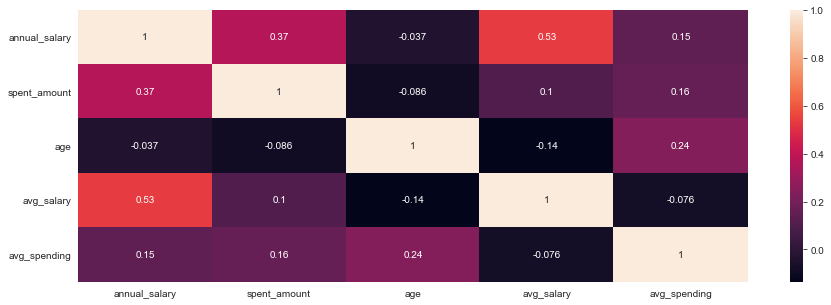

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(df[['annual_salary','spent_amount', 'age','avg_salary','avg_spending']].corr(), annot=True)

plt.show()

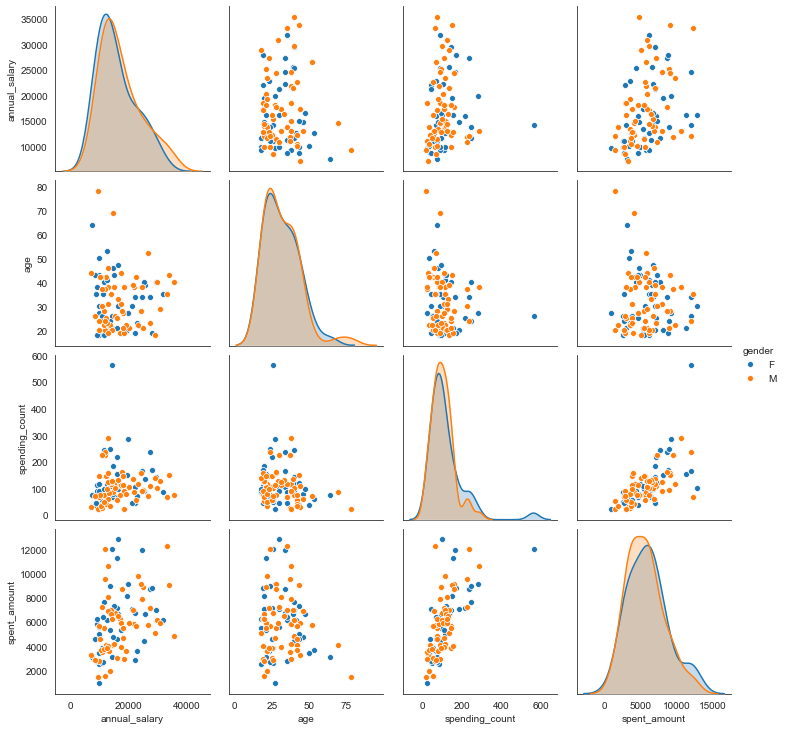

In [7]:
yam= df[['annual_salary','gender','age','spending_count','spent_amount']]
sns.pairplot(data=yam, hue='gender')

plt.show()

## Simple Regression 

### Spending Behavior vs Annual Salary

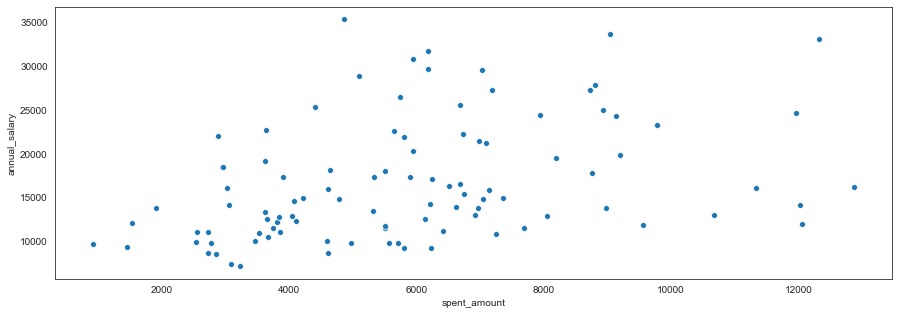

In [8]:
plt.figure(figsize=(15,5))

sns.scatterplot(x =df.spent_amount, y =df.annual_salary, data = df, ci = None)
plt.show()

In [9]:
x= np.array(df.spent_amount).reshape(-1,1)  # Independent
y= np.array(df.annual_salary).reshape(-1,1)   # Dependent

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
len(x), len(x_test)

(100, 20)

In [12]:
simple_lr = LinearRegression()

simple_lr.fit(x_train, y_train)

y_pred= simple_lr.predict(x_test)
# y_pred

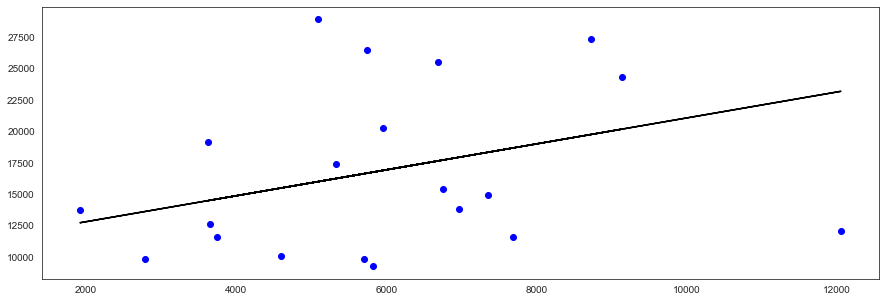

In [13]:
plt.figure(figsize=(15,5))

plt.scatter(x_test, y_test, color ='b') 
plt.plot(x_test, y_pred, color ='k') 

plt.show() 

In [14]:
score = mean_absolute_error(y_test,y_pred)
score

5453.111889184629

## Multi Variate regression

In [15]:
new_df= df[['gender','age','spending_count','spent_amount','annual_salary']]
new_df.head()

,gender,age,spending_count,spent_amount,annual_salary
0,F,53,60,3652.86,12616.11
1,M,21,93,8933.82,25050.55
2,M,28,74,5511.54,11499.06
3,F,34,105,6732.75,22248.07
4,F,34,238,8724.61,27326.11


In [16]:
new_df['gender']= np.where(new_df['gender']== 'F',0,1)

C:\Users\Arowolo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
x= new_df.drop('annual_salary', axis=1)
y= new_df['annual_salary']

In [18]:
scaler = MinMaxScaler()
x= scaler.fit_transform(x)

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

#### Linear Regression Model

In [20]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred= model_lr.predict(x_test)

model_lr.score(x_train, y_train)

0.2328868670673948

In [21]:
score = mean_absolute_error(y_test,y_pred)
score

5423.1075209996

#### Decision Tree Model

In [22]:
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
y_pred= model_tree.predict(x_test)

model_tree.score(x_test, y_test)

-1.401279245584532

In [23]:
score = mean_absolute_error(y_test,y_pred)
score

7836.911